## CamCan Suspense CRM

To annotate suspense, we used an online rating tool (Nummenmaa et al., 2012) and collected continuous responses of suspense while participants viewed the movie. The data have been prepared to match the resolution of the fMRI data.
The code below reads the continuous response measurements in, averages them across viewers, and creates plots and supplementary analyses.

### setting up modules

In [1]:
import os, sys, scipy, warnings
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats

%matplotlib inline
warnings.filterwarnings("ignore")

### set up files

In [2]:
suspense_data = '../data/suspense.npy'
all_suspense = np.load(suspense_data)
print(all_suspense.shape)

avg_suspense = np.mean(all_suspense, axis = 0)

(22, 193)


### create dataframe and plot averaged traces with CI (Figure 4)

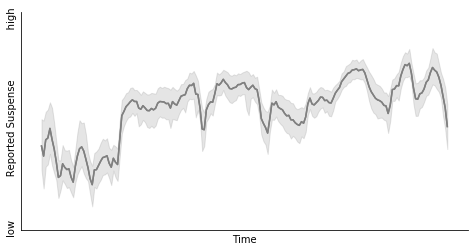

In [3]:
values          = np.hstack(all_suspense)
times           = np.hstack([np.arange(193)] * 22)
values_times    = np.vstack((values,times)).T
df_values_times = pd.DataFrame(data =  values_times, columns = ['values','times'])

f = plt.figure(figsize=(8,4));
sns.lineplot(x     = "times", 
             y     = "values", 
             color = 'gray',
             data  = df_values_times);
plt.plot(avg_suspense, color = 'gray');
plt.ylabel('low              Reported Suspense                high');
plt.xlabel('Time');
plt.ylim(-2.5,2);
plt.xticks([]);
plt.yticks([]);
sns.despine();

### permute split half analysis

Average :0.87


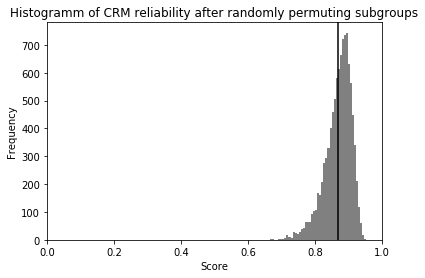

In [4]:
perm_results = []
n_subjs      = all_suspense.shape[0]
subj_vector  = np.arange(n_subjs) 
n_permute    = 10000

for curr_permute in range(n_permute):
    np.random.shuffle(subj_vector)
    first_group  = subj_vector[0 : int(n_subjs/2)]
    second_group = subj_vector[int(n_subjs/2) : ]
    all_s1       = np.mean(all_suspense[first_group, :], axis = 0)
    all_s2      = np.mean(all_suspense[second_group, :], axis = 0)
    perm_results.append(np.corrcoef(all_s1, all_s2)[0,1])
      
plt.hist(perm_results, 50, color = 'gray');
m = np.round(np.mean(perm_results),2)
plt.axvline(m, color = 'black')
plt.xlim(0,1)
plt.title('Histogramm of CRM reliability after randomly permuting subgroups')
plt.xlabel('Score')
plt.ylabel('Frequency')
print("Average :" + str(m))

### plot one instance of split half analysis as traces

0.9369316023010391

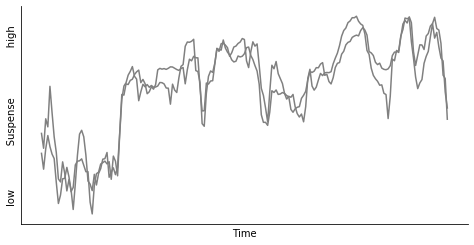

In [5]:
all_s1 = np.mean(all_suspense[:11, :], axis = 0)
all_s2 = np.mean(all_suspense[11:, :], axis = 0)

f = plt.figure(figsize = (8,4));
plt.plot(all_s1, color = 'gray')
plt.plot(all_s2, color = 'gray')
plt.ylabel('low              Suspense                high');
plt.xlabel('Time');
plt.xticks([]);
plt.yticks([]);
sns.despine()

np.corrcoef(all_s1, all_s2)[0,1]